# Example of how to use emcee for MCMC runs

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import emcee

In [2]:
def lnprob(x, mu, icov):
    diff = x-mu
    return -np.dot(diff,np.dot(icov,diff))/2.0

In [3]:
# setup mean and covariance of the multivariate Gaussian
ndim = 5
means = np.random.rand(ndim)
cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)
icov = np.linalg.inv(cov)

In [4]:
# setup initial walkers
nwalkers = 20
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

In [5]:
p0

array([[ 0.9201421 ,  0.49681248,  0.24671053,  0.25575367,  0.11073078],
       [ 0.472858  ,  0.55367761,  0.27768906,  0.16443787,  0.37631513],
       [ 0.94255993,  0.8188378 ,  0.65567286,  0.0994169 ,  0.30676207],
       [ 0.33787944,  0.08705319,  0.31195462,  0.20239881,  0.96484034],
       [ 0.20045211,  0.98380712,  0.14479869,  0.33403789,  0.69614011],
       [ 0.49297533,  0.43375299,  0.88641881,  0.58738854,  0.10750355],
       [ 0.83071487,  0.38983839,  0.05640141,  0.67686085,  0.57197072],
       [ 0.8488003 ,  0.7310161 ,  0.98820042,  0.9988592 ,  0.15079617],
       [ 0.10414968,  0.31937518,  0.51193658,  0.6517093 ,  0.74763223],
       [ 0.50645468,  0.14052494,  0.2714052 ,  0.66097   ,  0.60282857],
       [ 0.11096096,  0.38396179,  0.47912167,  0.5320719 ,  0.82355711],
       [ 0.8045782 ,  0.28504746,  0.16768736,  0.08121443,  0.18323771],
       [ 0.03998463,  0.25343602,  0.99520965,  0.8663783 ,  0.42777819],
       [ 0.17136054,  0.2854626 ,  0.8

In [6]:
# setup sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, icov])
# burn-in phase
pos, prob, state = sampler.run_mcmc(p0, 100)
# reset and run actual chains
sampler.reset()
info=sampler.run_mcmc(pos, 1000)

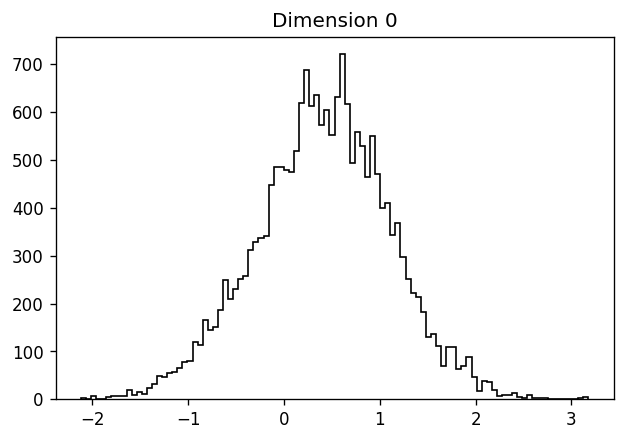

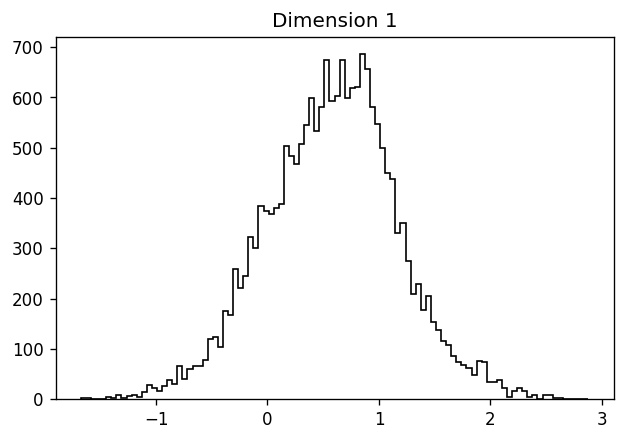

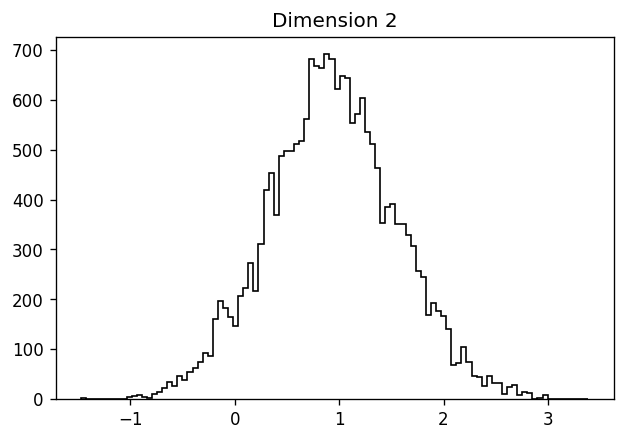

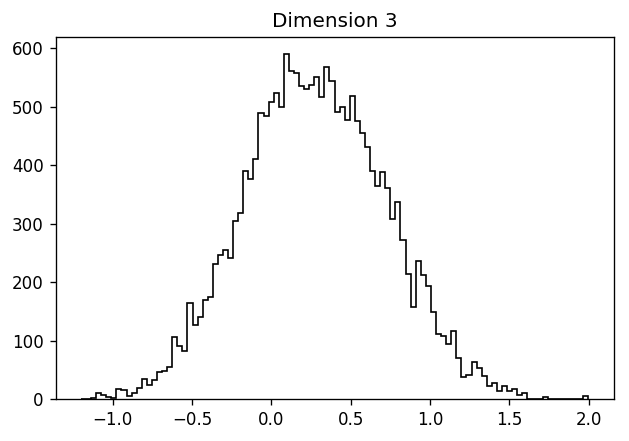

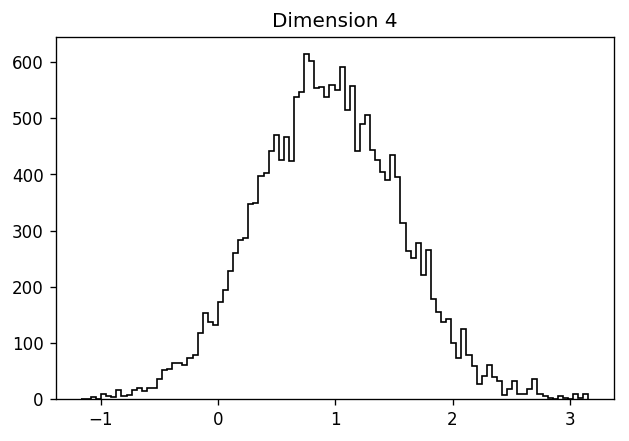

In [7]:
for i in range(ndim):
    plt.figure()
    plt.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    plt.title("Dimension {0:d}".format(i))

In [8]:
p0

array([[ 0.9201421 ,  0.49681248,  0.24671053,  0.25575367,  0.11073078],
       [ 0.472858  ,  0.55367761,  0.27768906,  0.16443787,  0.37631513],
       [ 0.94255993,  0.8188378 ,  0.65567286,  0.0994169 ,  0.30676207],
       [ 0.33787944,  0.08705319,  0.31195462,  0.20239881,  0.96484034],
       [ 0.20045211,  0.98380712,  0.14479869,  0.33403789,  0.69614011],
       [ 0.49297533,  0.43375299,  0.88641881,  0.58738854,  0.10750355],
       [ 0.83071487,  0.38983839,  0.05640141,  0.67686085,  0.57197072],
       [ 0.8488003 ,  0.7310161 ,  0.98820042,  0.9988592 ,  0.15079617],
       [ 0.10414968,  0.31937518,  0.51193658,  0.6517093 ,  0.74763223],
       [ 0.50645468,  0.14052494,  0.2714052 ,  0.66097   ,  0.60282857],
       [ 0.11096096,  0.38396179,  0.47912167,  0.5320719 ,  0.82355711],
       [ 0.8045782 ,  0.28504746,  0.16768736,  0.08121443,  0.18323771],
       [ 0.03998463,  0.25343602,  0.99520965,  0.8663783 ,  0.42777819],
       [ 0.17136054,  0.2854626 ,  0.8

In [10]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.552
